In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, metrics
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score

import skimage.io as io
from skimage.io import imread
from skimage.transform import resize

import os
from tqdm import tqdm
from glob import glob

In [68]:
train_path = 'image/'
tumor_label=pd.read_csv('label.csv')
img_size = 100
label = []
image_data = []
image_img =[] 
    
    
for img_path in tqdm(glob(train_path + '/*.jpg')):
    img = imread(img_path)
    img_resized = resize(img, (img_size, img_size))
    image_img.append(img_resized)
    image_data.append(img_resized.flatten())

    
for i in range(3000):
    data = tumor_label['label'][i]
    if data == 'no_tumor':
        label.append(data)
    else :
        label.append('yes_tumor')
        


100%|██████████| 3000/3000 [01:03<00:00, 47.02it/s]


In [69]:
image_data = np.array(image_data)
label = np.array(label)

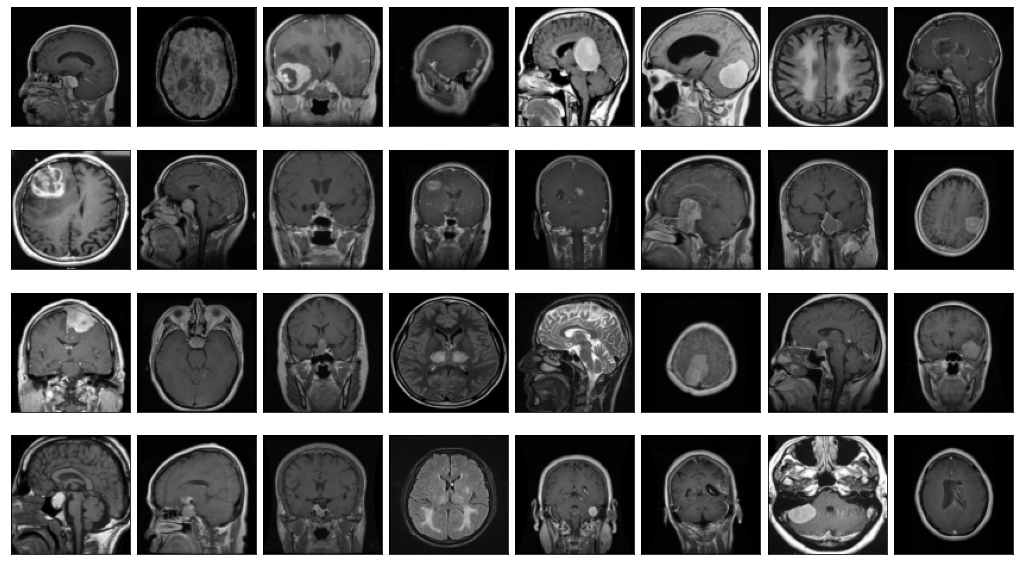

In [61]:
%matplotlib inline
plt.figure(figsize=(20,20))
for i in range(1,33):
    plt.subplot(4,8,i)
    plt.imshow(image_img[i-1])
    plt.xticks([])
    plt.yticks([])  
plt.subplots_adjust(left=0.1, bottom=0.5, right=0.8, wspace=0.01)
plt.show()

In [70]:
X = image_data
Y = label
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [63]:
def SVM(x_train,y_train, x_test):
    model = SVC(kernel='linear',C = 1.0)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    return y_pred

y_pred=SVM(x_train,y_train, x_test)

print(accuracy_score(y_test,y_pred))

0.9188888888888889


In [71]:
def SVM(x_train,y_train, x_test):
    model = SVC(kernel='rbf', gamma=0.7, C=1.0)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    return y_pred

y_pred=SVM(x_train,y_train, x_test)

print(accuracy_score(y_test,y_pred))

0.9011111111111111
